In [1]:
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing

In [2]:
y = pd.read_csv('data/y.csv').iloc[:, 0]
FS1 = pd.read_csv('data/FS1.csv', dtype=float)
PS2 = pd.read_csv('data/PS2.csv', dtype=float)

## Merge all features

Combine all features from FS1 and PS2 in a single vector.

In [3]:
def merge_features(df1, df2):
    return pd.merge(df1, df2, left_index=True, right_index=True)

X = merge_features(FS1, PS2)
X.shape

(2205, 6600)

In [4]:
X

,1_FS1,2_FS1,3_FS1,4_FS1,5_FS1,6_FS1,7_FS1,8_FS1,9_FS1,10_FS1,...,5991_PS2,5992_PS2,5993_PS2,5994_PS2,5995_PS2,5996_PS2,5997_PS2,5998_PS2,5999_PS2,6000_PS2
0,8.990,0.770,0.641,0.006,0.000,0.000,0.001,0.003,0.001,0.001,...,125.02,125.00,125.10,125.09,124.98,124.91,124.98,125.11,125.14,125.10
1,8.919,0.815,0.709,0.009,0.004,0.000,0.001,0.000,0.000,0.001,...,124.80,124.88,125.13,125.22,125.09,124.98,125.06,125.13,125.09,125.04
2,9.179,0.683,0.528,0.008,0.003,0.001,0.003,0.003,0.004,0.006,...,124.61,124.69,124.74,124.71,124.59,124.64,124.74,124.73,124.77,124.88
3,9.034,0.728,0.595,0.009,0.001,0.004,0.003,0.003,0.003,0.001,...,124.82,124.79,124.69,124.69,124.77,124.83,124.69,124.53,124.51,124.59
4,8.729,0.705,0.446,0.014,0.007,0.003,0.001,0.003,0.001,0.000,...,124.80,124.67,124.49,124.56,124.69,124.62,124.45,124.41,124.47,124.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,8.173,1.024,0.834,0.009,0.000,0.001,0.000,0.003,0.001,0.000,...,125.57,125.51,125.38,125.43,125.59,125.61,125.53,125.50,125.60,125.73
2201,8.317,0.883,0.799,0.008,0.005,0.000,0.000,0.000,0.000,0.001,...,125.86,125.77,125.74,125.81,125.77,125.66,125.58,125.58,125.55,125.44
2202,8.170,0.686,0.583,0.011,0.000,0.003,0.004,0.000,0.000,0.000,...,125.66,125.73,125.77,125.81,125.94,126.04,125.98,125.84,125.84,125.94
2203,8.496,0.543,0.366,0.009,0.005,0.000,0.000,0.000,0.001,0.003,...,125.55,125.56,125.58,125.74,125.84,125.73,125.66,125.73,125.86,125.91


## Train/test split

First 2k samples will be used for the training, rest for the test.

In [5]:
def train_test_split(X, y, n=2000):

    y_train = y.iloc[:n]
    X_train = X.iloc[:n, :]

    y_test = y.iloc[n:]
    X_test = X.iloc[n:, :]

    print('X_train: ', X_train.shape)
    print('y_train: ', y_train.shape)
    print('X_test: ', X_test.shape)
    print('y_test: ', y_test.shape)

    return X_train, y_train, X_test, y_test

In [6]:
X_train, y_train, X_test, y_test = train_test_split(X, y)

X_train:  (2000, 6600)
y_train:  (2000,)
X_test:  (205, 6600)
y_test:  (205,)


Check data distribution in training and test sets:

In [7]:
pd.concat(
    [
        y.value_counts(normalize=True).rename('all'), 
        y_train.value_counts(normalize=True).rename('train'), 
        y_test.value_counts(normalize=True).rename('test')
    ]
    , axis=1).round(2)

,all,train,test
valve condition,,,
1,0.51,0.53,0.36
0,0.49,0.47,0.64


Train set has approximatevely the same distribution of target variable as the whole dataset. However the test set has significantly less positive examples.

# Base model

## Choice of the evaluation metric

Since the dataset is well balanced we could start with accuracy, precision or recall. For simplicity let's start with acuracy.

## Model

### Logistic regression

In [8]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [9]:
print('Train set accuracy = ', clf.score(X_train, y_train))
print('Test  set accuracy = ', clf.score(X_test, y_test))

Train set accuracy =  1.0
Test  set accuracy =  1.0


Confusion matrix

In [10]:
y_hat_train = clf.predict(X_train)
y_hat_test = clf.predict(X_test)

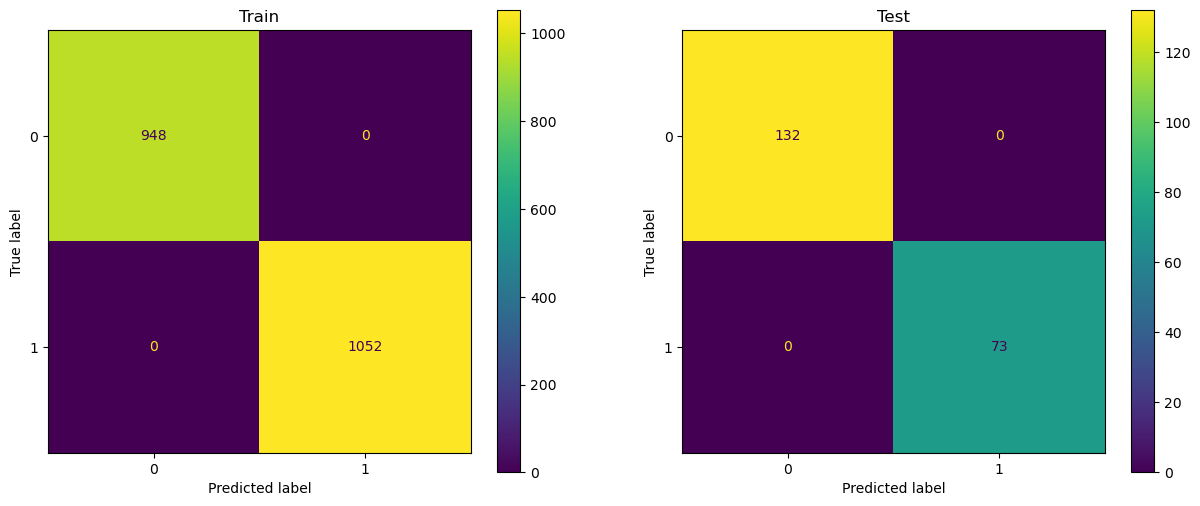

In [11]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
axs[0].set_title("Train")
axs[1].set_title("Test")
ConfusionMatrixDisplay.from_estimator(clf, X_train, y_train, ax=axs[0])
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, ax=axs[1])
plt.show()

Cross-validation score:

In [12]:
scores = cross_validate(LogisticRegression(random_state=0, max_iter=300), X, y, cv=5, scoring='accuracy', return_train_score=True)

pd.DataFrame(scores)[['train_score', 'test_score']]

,train_score,test_score
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0


Base model acheives perfect score.

# Base model exploration and improvement

1. Explore the data to understand how LR can acheive perfect separation of target classes.
1. Try to improve base model (simplify, smth else?)

## Reduce time resolution

Currently there are too many features. We ould try to reduce their number by decreasing time resolution, first in PS2, then both in FS1 and PS2.

In [13]:
def reduce_time_resolution(df, stride):
    if stride == 1:
        return df
    
    df_reduced = []
    for i in range(0, df.shape[1], stride):
        avg_cols = df.iloc[:, i:i+stride].mean(axis=1)
        avg_cols.name = df.iloc[:, i].name
        df_reduced.append(avg_cols)

    df_reduced = pd.concat(df_reduced, axis=1)

    return df_reduced

After a series of tests I have converged to these values, which correspond to the same time resolution in FS1 and PS2 equal to 5 sec.

In [14]:
FS1_reduced = reduce_time_resolution(FS1, stride=50)
PS2_reduced = reduce_time_resolution(PS2, stride=500)

FS1_reduced.shape, PS2_reduced.shape

((2205, 12), (2205, 12))

Combine FS1 and PS2 features:

In [15]:
X = merge_features(FS1_reduced, PS2_reduced)
X.shape

(2205, 24)

In [16]:
X_train, y_train, X_test, y_test = train_test_split(X, y)

X_train:  (2000, 24)
y_train:  (2000,)
X_test:  (205, 24)
y_test:  (205,)


### LR with coarser time resolution

In [17]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [18]:
print('Train set accuracy = ', clf.score(X_train, y_train))
print('Test  set accuracy = ', clf.score(X_test, y_test))

Train set accuracy =  1.0
Test  set accuracy =  1.0


Cross-validation score:

In [19]:
scores = cross_validate(LogisticRegression(random_state=0, max_iter=300), X, y, cv=5, scoring='accuracy', return_train_score=True)

pd.DataFrame(scores)[['train_score', 'test_score']]

,train_score,test_score
0,1.0,1.000000
1,1.0,0.857143
2,1.0,1.000000
3,1.0,1.000000
4,1.0,1.000000


## Feature selection

Probably we could further simplify the model by selecting only the most important features.

For LR we can estimate feature importance by the value of the coefficient corresponding to this feature. Features must be standartized before this.

In [20]:
X = merge_features(FS1_reduced, PS2_reduced)
X.shape

(2205, 24)

In [21]:
X_train, y_train, X_test, y_test = train_test_split(X, y)

X_train:  (2000, 24)
y_train:  (2000,)
X_test:  (205, 24)
y_test:  (205,)


In [22]:
clf = make_pipeline(StandardScaler(), LogisticRegression(random_state=0, max_iter=300)).fit(X_train, y_train)

In [23]:
print('Train set accuracy = ', clf.score(X_train, y_train))
print('Test  set accuracy = ', clf.score(X_test, y_test))

Train set accuracy =  1.0
Test  set accuracy =  1.0


In [24]:
scores = cross_validate(make_pipeline(StandardScaler(), LogisticRegression(random_state=0, max_iter=300)), X, y, cv=5, scoring='accuracy', return_train_score=True)

pd.DataFrame(scores)[['train_score', 'test_score']]

,train_score,test_score
0,1.0,0.959184
1,1.0,0.854875
2,1.0,1.000000
3,1.0,1.000000
4,1.0,1.000000


Feature importance:

<Axes: xlabel='feature'>

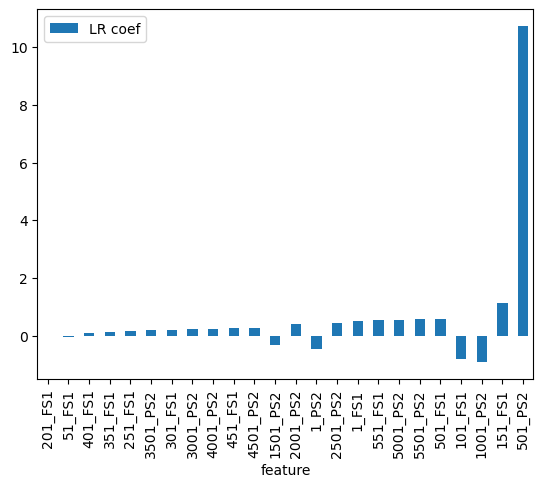

In [25]:
feature_importance = pd.DataFrame({'feature': X_train.columns, 'LR coef': clf['logisticregression'].coef_[0]})
feature_importance['LR coef abs'] = feature_importance['LR coef'].abs()

feature_importance.sort_values(by=['LR coef abs']).plot.bar(x='feature', y='LR coef')

It appears that the most important information comes from PS2 in the time range between 500 and 1000 sample.

What happens at this moment? Examination of the figure below shows that the most important events happen between 900 and 1000.

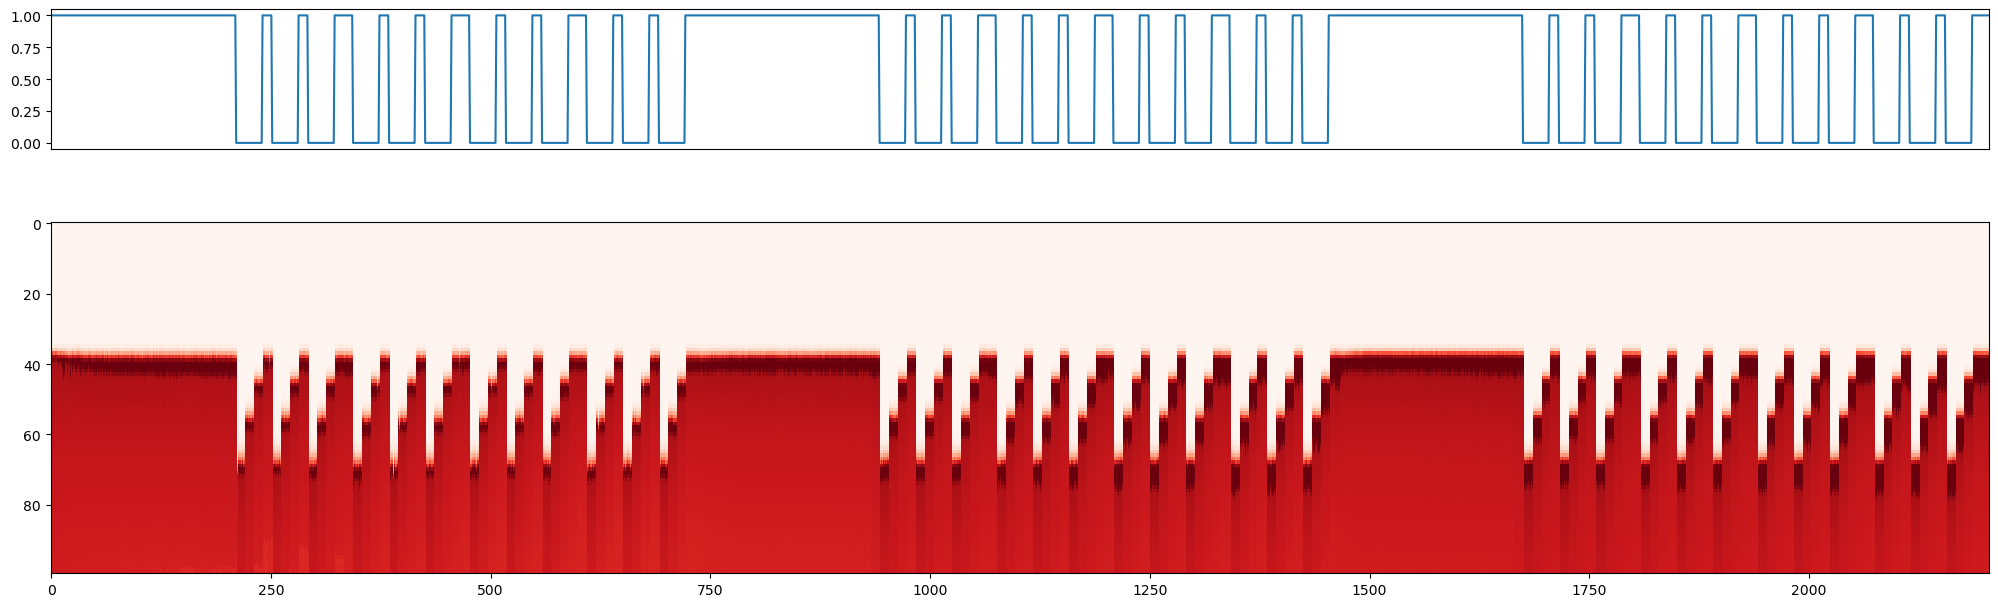

In [26]:
fig, axs = plt.subplots(nrows=2, ncols=1, height_ratios=[1, 4], figsize=(20, 7))

axs[1].imshow(PS2.iloc[:, 900:1000].T, interpolation="none", cmap='Reds', aspect=4)

axs[0].plot(y)
axs[0].set_xlim(0, y.size)
axs[0].get_xaxis().set_visible(False)

fig.tight_layout()

Same moment for FS1. We observe the same phenomena but with more noise.

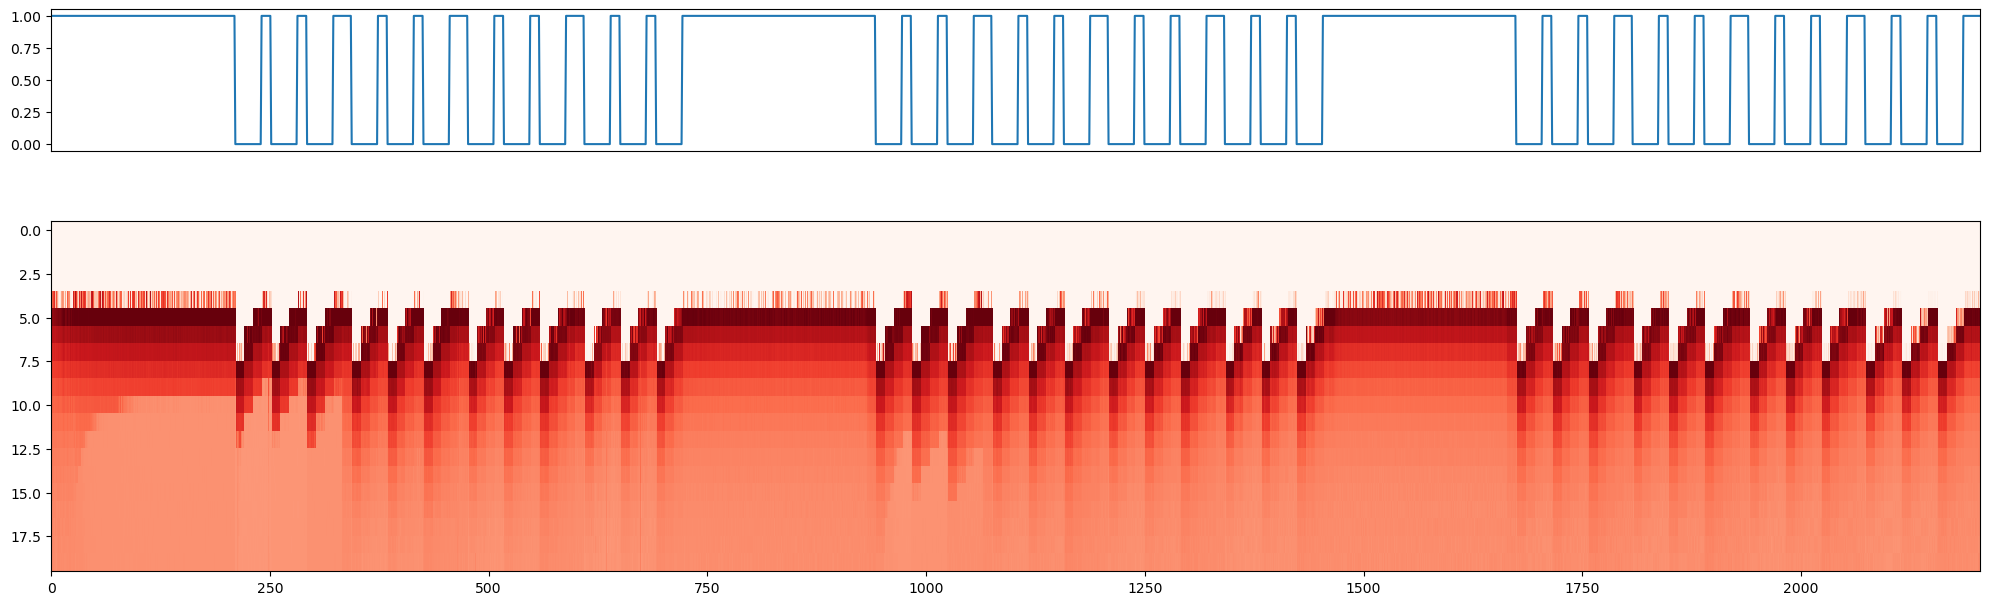

In [27]:
fig, axs = plt.subplots(nrows=2, ncols=1, height_ratios=[1, 4], figsize=(20, 7))

axs[1].imshow(FS1.iloc[:, 90:110].T, interpolation="none", cmap='Reds', aspect=20)

axs[0].plot(y)
axs[0].set_xlim(0, y.size)
axs[0].get_xaxis().set_visible(False)

fig.tight_layout()

How does the model see it:

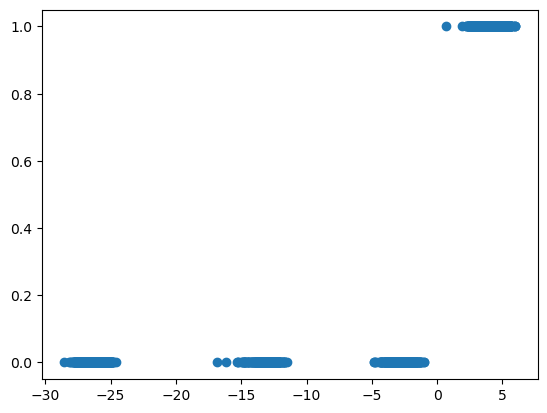

In [28]:
plt.scatter(clf['logisticregression'].coef_ @ clf['standardscaler'].transform(X).T + clf['logisticregression'].intercept_, y)

Try to use this only feature.

Note of caution.



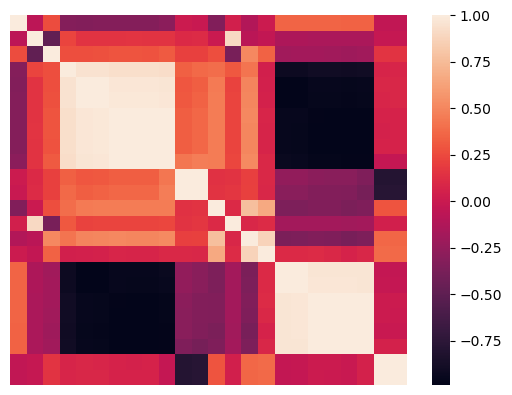

In [29]:
corrs = X_train.corr('pearson')
sns.heatmap(corrs, annot=False, xticklabels=False, yticklabels=False);

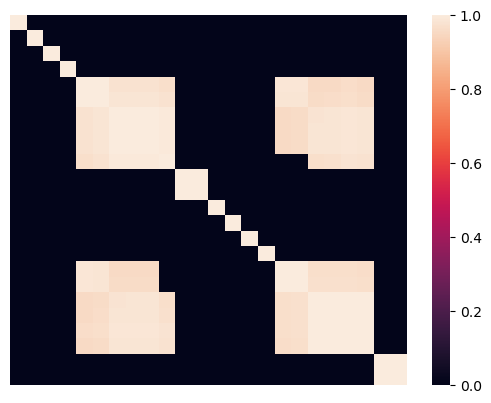

In [30]:
corrs_abs = corrs.abs()
corrs_abs[corrs_abs < 0.95] = 0

sns.heatmap(corrs_abs, annot=False, xticklabels=False, yticklabels=False);

## Keep PS2 only

In [31]:
X = PS2_reduced.copy()
X.shape

(2205, 12)

In [32]:
X_train, y_train, X_test, y_test = train_test_split(X, y)

X_train:  (2000, 12)
y_train:  (2000,)
X_test:  (205, 12)
y_test:  (205,)


In [33]:
clf = make_pipeline(StandardScaler(), LogisticRegression(random_state=0, max_iter=300)).fit(X_train, y_train)

In [34]:
print('Train set accuracy = ', clf.score(X_train, y_train))
print('Test  set accuracy = ', clf.score(X_test, y_test))

Train set accuracy =  1.0
Test  set accuracy =  1.0


In [35]:
scores = cross_validate(make_pipeline(StandardScaler(), LogisticRegression(random_state=0, max_iter=300)), X, y, cv=5, scoring='accuracy', return_train_score=True)

pd.DataFrame(scores)[['train_score', 'test_score']]

,train_score,test_score
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0


Feature importance:

<Axes: xlabel='feature'>

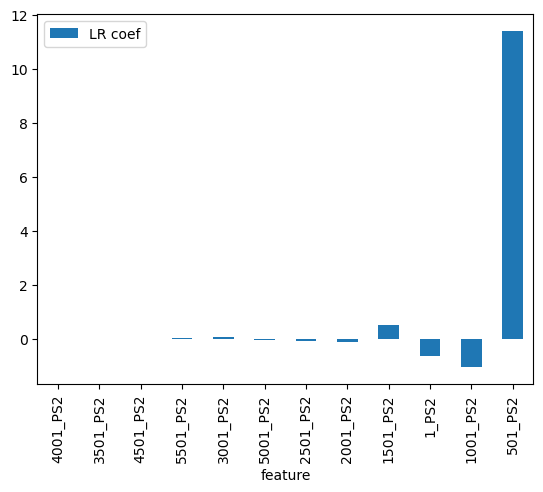

In [36]:
feature_importance = pd.DataFrame({'feature': X_train.columns, 'LR coef': clf['logisticregression'].coef_[0]})
feature_importance['LR coef abs'] = feature_importance['LR coef'].abs()

feature_importance.sort_values(by=['LR coef abs']).plot.bar(x='feature', y='LR coef')

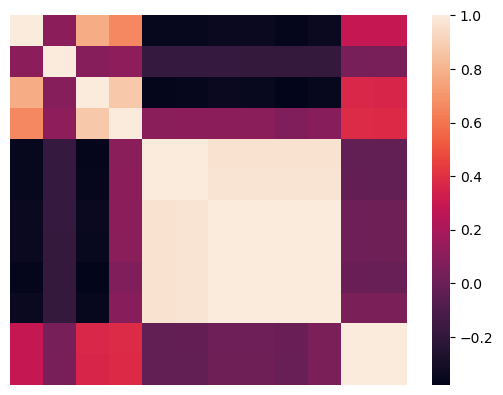

In [37]:
corrs = X_train.corr('pearson')
sns.heatmap(corrs, annot=False, xticklabels=False, yticklabels=False);

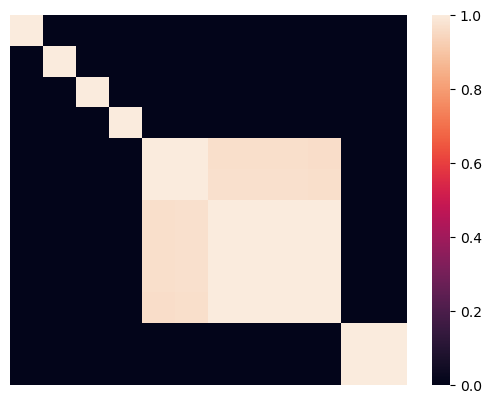

In [38]:
corrs_abs = corrs.abs()
corrs_abs[corrs_abs < 0.95] = 0

sns.heatmap(corrs_abs, annot=False, xticklabels=False, yticklabels=False);

## Keep one feature only

In [39]:
X = PS2_reduced.iloc[:, [1]].copy()
X.shape

(2205, 1)

In [40]:
X_train, y_train, X_test, y_test = train_test_split(X, y)

X_train:  (2000, 1)
y_train:  (2000,)
X_test:  (205, 1)
y_test:  (205,)


In [41]:
clf = make_pipeline(StandardScaler(), LogisticRegression(random_state=0, max_iter=300)).fit(X_train, y_train)

In [42]:
print('Train set accuracy = ', clf.score(X_train, y_train))
print('Test  set accuracy = ', clf.score(X_test, y_test))

Train set accuracy =  1.0
Test  set accuracy =  1.0


In [43]:
scores = cross_validate(make_pipeline(StandardScaler(), LogisticRegression(random_state=0, max_iter=300)), X, y, cv=5, scoring='accuracy', return_train_score=True)

pd.DataFrame(scores)[['train_score', 'test_score']]

,train_score,test_score
0,1.000000,0.997732
1,0.999433,0.997732
2,1.000000,1.000000
3,1.000000,1.000000
4,1.000000,0.997732


## Optimized single feature

Improving filtering we might arrive at better feature.

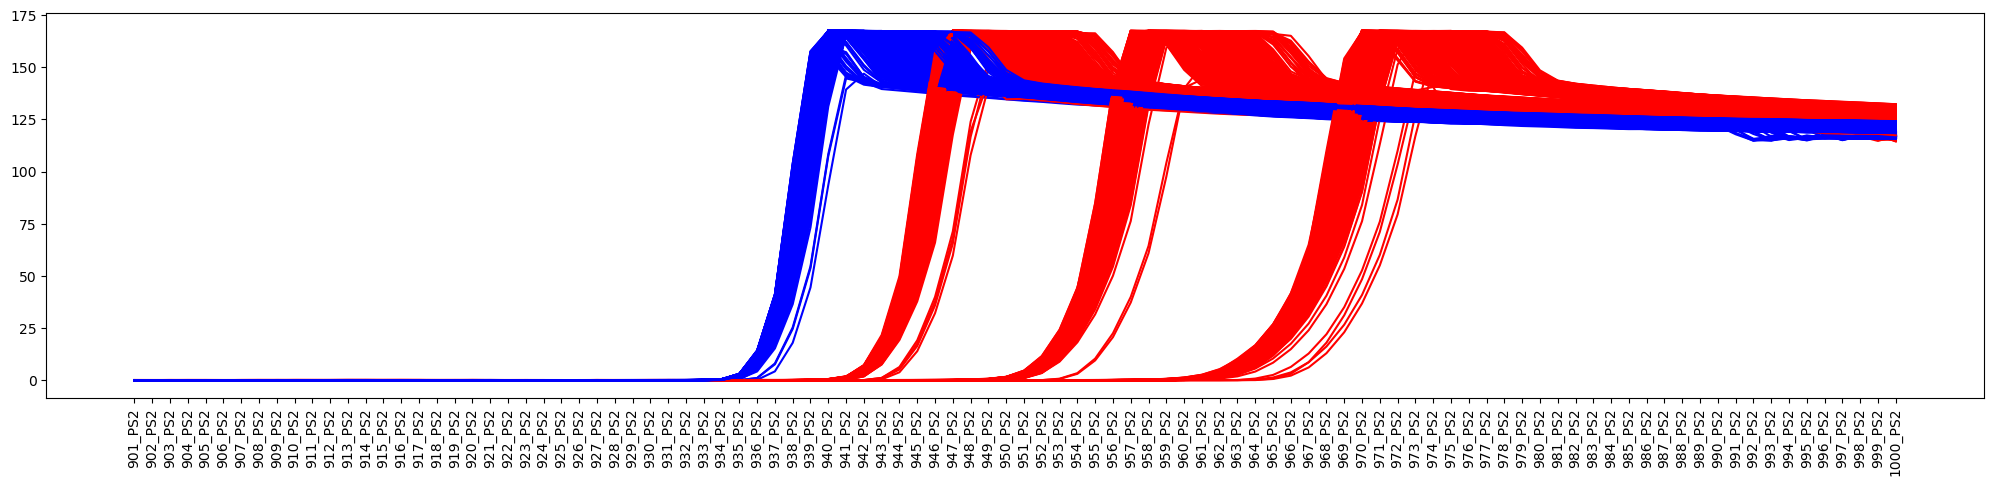

In [50]:
fig, ax = plt.subplots(figsize=(25, 5))
for i, s in PS2.iloc[:, 900:1000].iterrows():
    c = 'r' if y[i] == 0 else 'b'
    ax.plot(s, c=c)
ax.tick_params(axis='x', rotation=90)